In [3]:
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import dlc_practical_prologue as dlc

import matplotlib.pyplot as plt

from training import train_net, evaluate_model
from models import ConvNet, ConvNetWeightSharing

In [4]:
nb_samples = 1000

In [5]:
train_input, train_target, train_classes, test_input, test_target, test_classes = dlc.generate_pair_sets(nb_samples)

100.1%

Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


113.5%

Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw


100.4%

Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


180.4%../torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw
Processing...
Done!


In [6]:
print(train_input.shape)

torch.Size([1000, 2, 14, 14])


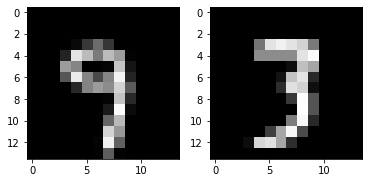

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(train_input[0,0], cmap='gray', vmin=0, vmax=255)
ax2.imshow(train_input[0,1], cmap='gray', vmin=0, vmax=255)
plt.savefig("typical_input_notext")

In [8]:
t.random.manual_seed(0)
params = {}
params['num_hidden_1'] = 10
params['num_hidden_2'] = 20
convnet_model, loss, test_errors, train_errors = train_net(ConvNet, 25, train_input, train_target, train_classes, test_input, test_target, test_classes, nn.CrossEntropyLoss(), params, aux=False)

In [9]:
evaluate_model(convnet_model)

test error Net 24.00% 242/1000
test error Net 22.00% 220/1000
test error Net 22.00% 221/1000
test error Net 24.00% 246/1000
test error Net 23.00% 238/1000
test error Net 22.00% 225/1000
test error Net 22.00% 225/1000
test error Net 21.00% 215/1000
test error Net 23.00% 231/1000
test error Net 23.00% 239/1000
Test error mean 23.02%
Test error std 1.05%


In [22]:
t.random.manual_seed(0)
weight_sharing_model, loss, test_errors, train_errors = train_net(ConvNetWeightSharing, 25, train_input, train_target, train_classes, test_input, test_target, test_classes, nn.CrossEntropyLoss(), params, aux=False)

In [23]:
evaluate_model(weight_sharing_model)

test error Net 18.00% 180/1000
test error Net 15.00% 159/1000
test error Net 16.00% 164/1000
test error Net 17.00% 175/1000
test error Net 16.00% 163/1000
test error Net 14.00% 141/1000
test error Net 17.00% 175/1000
test error Net 13.00% 139/1000
test error Net 16.00% 167/1000
test error Net 15.00% 155/1000
Test error mean 16.18%
Test error std 1.38%


In [24]:
t.random.manual_seed(23) # go for 23: 13.11%, tested until seed=44
weight_sharing_aux_model, loss, test_errors, train_errors = train_net(ConvNetWeightSharing, 25, train_input, train_target, train_classes, test_input, test_target, test_classes, nn.CrossEntropyLoss(), params, aux=True)

In [25]:
evaluate_model(weight_sharing_aux_model)

test error Net 13.00% 130/1000
test error Net 12.00% 125/1000
test error Net 12.00% 120/1000
test error Net 13.00% 138/1000
test error Net 12.00% 125/1000
test error Net 11.00% 117/1000
test error Net 13.00% 133/1000
test error Net 14.00% 140/1000
test error Net 12.00% 127/1000
test error Net 14.00% 142/1000
Test error mean 12.97%
Test error std 0.85%


In [21]:
def train_rounds(num_rounds, model, epochs, criterion, params, aux):
    train_errors = t.Tensor(num_rounds)
    test_errors = t.Tensor(num_rounds)
    
    for i in range(num_rounds):
        train_input, train_target, train_classes, test_input, test_target, test_classes = dlc.generate_pair_sets(nb_samples)
        
        net, loss, trains, tests = train_net(model, epochs, train_input, train_target, train_classes, test_input, test_target, test_classes, criterion, params, aux)
        
        plt.plot(100*tests/data_in.size(0), label='testing error')
        plt.plot(100*trains/data_in.size(0), label='training error')
        plt.legend()
        plt.show()
        
        test_output, _, _ = net(test_input)
        
        nb_test_errors = t.sum(test_output.argmax(dim=1)!=(test_target))
        test_errors[i] = nb_test_errors
        if True:
            print('test error Net {:0.2f}% {:d}/{:d}'.format((100 * nb_test_errors) // test_input.size(0),
                                                      nb_test_errors, test_input.size(0)))
    test_errors = 100*test_errors/data_in.size(0)
    print('Test error mean {:0.2f}%'.format(test_errors.mean()))
    print('Test error std {:0.2f}%'.format(test_errors.std()))

In [22]:
t.random.manual_seed(2)

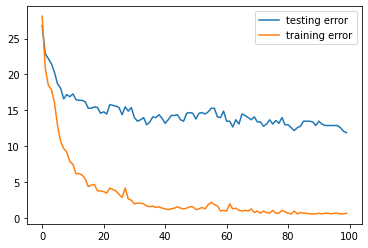

test error Net 11.00% 119/1000
Test error mean 11.90%
Test error std nan%


In [23]:
train_rounds(1, ConvNetWeightSharing, 100, train_input, train_target, train_classes, nn.CrossEntropyLoss(), params, aux=True)